#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('.\Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


# EDA 

In [2]:
df.shape

(148654, 13)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


in this cell we show the information about data and the datatype for any one.

In [4]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

- Each of [Notes, Status] as full nun value in data perpation we will dorp it 
- Some of futcher have a missing value will preparing it 

In [5]:
# Cheek if data have duplicated ?
df.duplicated().sum()

0

In [6]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [7]:
# What is the job title most frseqance
df['JobTitle'].value_counts()

JobTitle
Transit Operator                                  7036
Special Nurse                                     4389
Registered Nurse                                  3736
Public Svc Aide-Public Works                      2518
Police Officer 3                                  2421
                                                  ... 
CHIEF HOUSING INSPECTOR                              1
TRAFFIC SIGNAL OPERATOR                              1
COURT COMPUTER FACILITIES COORDINATOR                1
AUTOMOTIVE BODY AND FENDER WORKER SUPERVISOR I       1
VICTIM & WITNESS TECHNICIAN                          1
Name: count, Length: 2159, dtype: int64

the top 3 job's is:-
- Transit Operator 7036
- Special Nurse 4389
- Registered Nurse 3736

In [8]:
# The top 5 most common jobs
df['JobTitle'].value_counts().head()

JobTitle
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: count, dtype: int64


# Descriptive Statistics

In [9]:
# Show the descibe meguer in the numircal data.
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


in this cell we show the some descriptive statistics about data for ex(minumam, maxumam, mean, Std) it reflect some of data  

In [10]:
# For exsample make a some statistics in this futcher 'TotalPayBenefits'
df['TotalPayBenefits'].mean()

93692.55481056681

In [11]:
df['TotalPayBenefits'].std()

62793.53348323814

In [12]:
# Get the range of 'TotalPayBenefits' -- range = max - min
rangTotalPayBenefits = (df['TotalPayBenefits'].max() - df['TotalPayBenefits'].min())
rangTotalPayBenefits

568213.56

the range is the max - min & we have a built in function we well uesing it in the next cell

# Data Cleaning

In [13]:
# Drop unimportant columns.
df.drop(['Id','Notes','Agency','Status','EmployeeName','JobTitle'], axis=1, inplace= True)

In [14]:
# Fill mising value 
df.isnull().sum()

BasePay               609
OvertimePay             4
OtherPay                4
Benefits            36163
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64

In [15]:
# Fill mising value by mean 
mean_benefits = df['Benefits'].mean()
mean_benefits
df.fillna(mean_benefits, inplace = True)

In [16]:
df.isnull().sum()

BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

In [17]:
# Show some statatisc in dataset after cleaning 
df.describe().round(2)

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148654.00,148654.00,148654.00,148654.00,148654.00,148654.00,148654.00
mean,66156.18,5066.60,3649.34,25007.89,74768.32,93692.55,2012.52
std,42758.47,11454.69,8057.26,13398.41,50517.01,62793.53,1.12
min,-166.01,-0.01,-7058.59,-33.89,-618.13,-618.13,2011.00
25%,32792.54,0.00,0.00,22342.30,36169.00,44065.65,2012.00
50%,64861.60,0.00,811.35,25007.89,71426.61,92404.09,2013.00
75%,94605.74,4658.67,4237.03,33468.98,105839.14,132876.45,2014.00
max,319275.01,245131.88,400184.25,96570.66,567595.43,567595.43,2014.00


# Data Visualization

D:\New anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


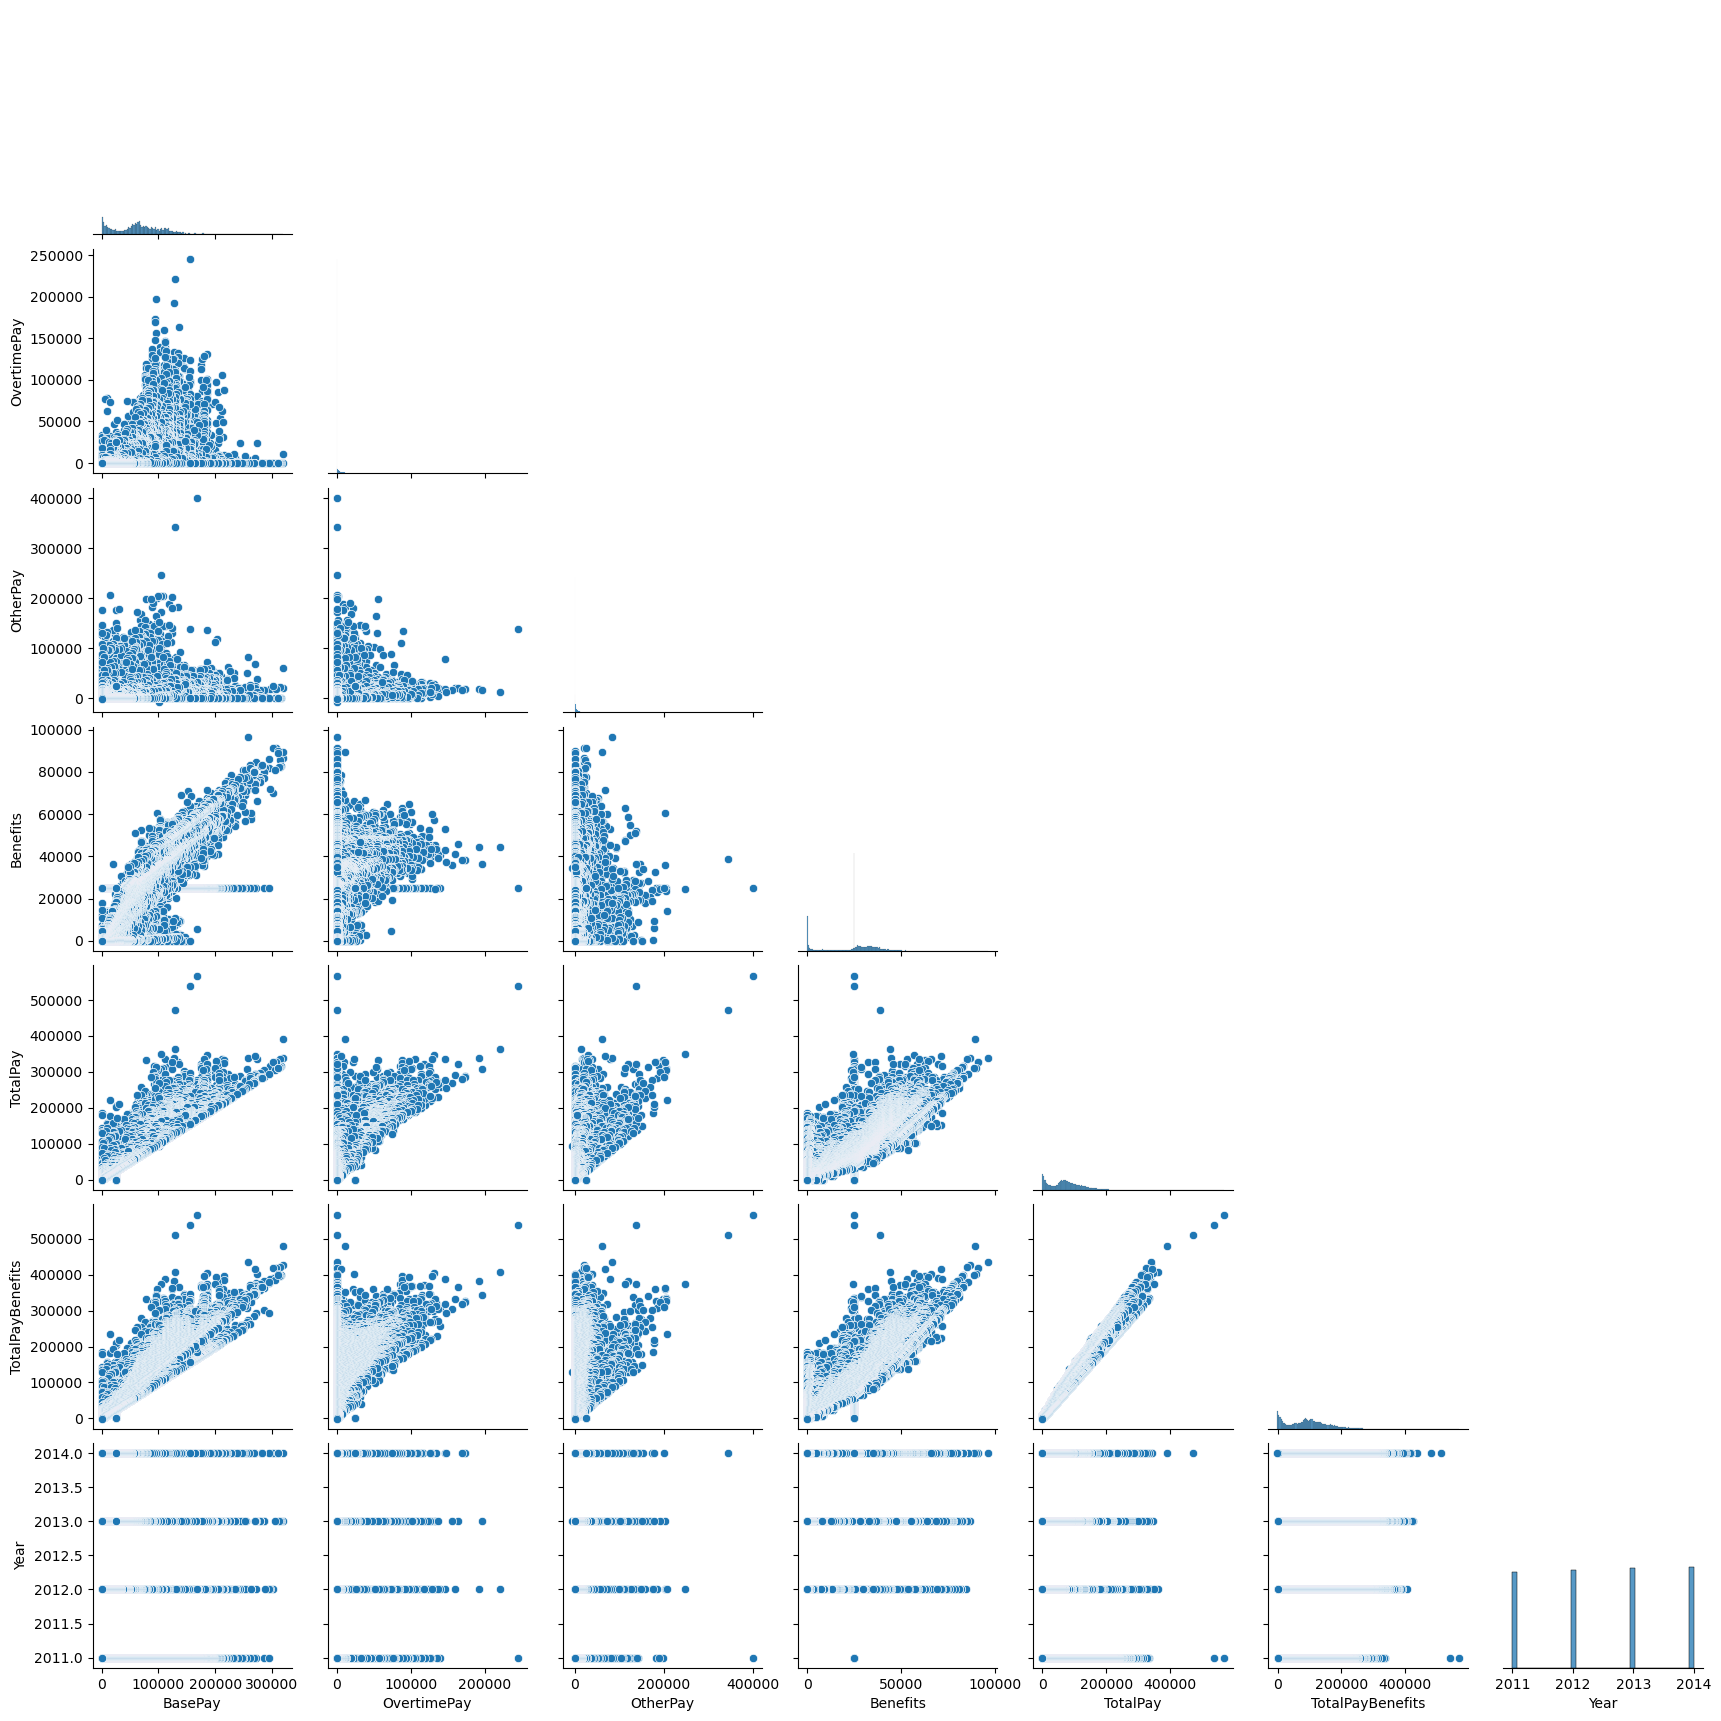

In [19]:
sns.pairplot(df, corner=True)

uesing pairplot we show the relation between the futshar 

<Axes: >

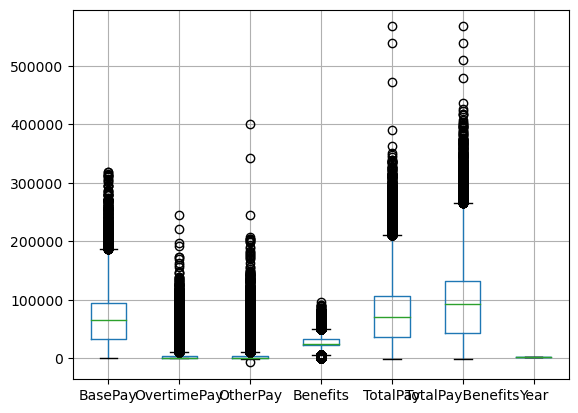

In [20]:
df.boxplot()

the most of data have outliers 

Text(0.5, 1.0, '5 number summary of TotalPayBenefits')

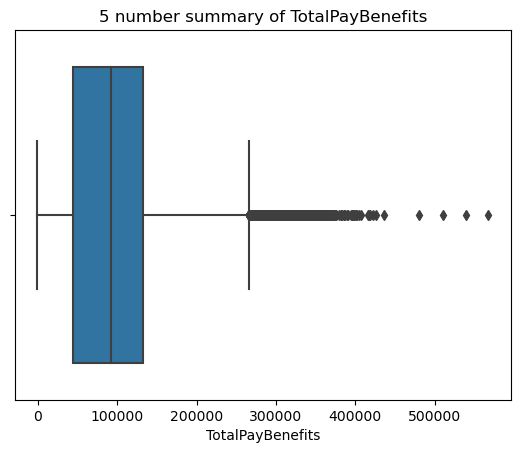

In [21]:
# Show the 5 namber summary for TotalPayBenefits
sns.boxplot(x=df['TotalPayBenefits']).set_title("5 number summary of TotalPayBenefits")

# Simple Correlation Analysis

In [22]:
df.isnull().sum()

BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BasePay           148654 non-null  float64
 1   OvertimePay       148654 non-null  float64
 2   OtherPay          148654 non-null  float64
 3   Benefits          148654 non-null  float64
 4   TotalPay          148654 non-null  float64
 5   TotalPayBenefits  148654 non-null  float64
 6   Year              148654 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 7.9 MB


<Axes: >

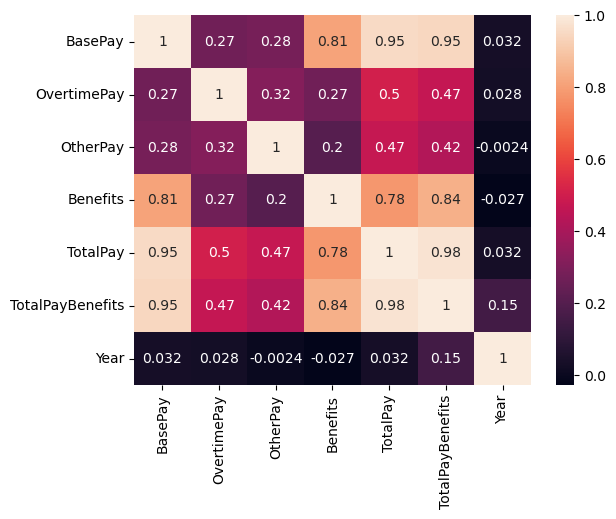

In [24]:
# Corrlation
sns.heatmap(df.corr(), annot=True)

from heatmap we show the corrlation between the futcher's 
- 95% in 'TotalPayBenefits' based on 'BasePay'

# Summary of Insights

About this data we work in salary for some empelwee at san francisco form 2011 : 2014 
- in SF. the mean of totalpaybenfit is about ***93500*** at year.